# Исследование надежности заемщиков.

Оценить, насколько аккуратно потенциальный заемщик будет выплачивать кредит - одна из ключевых задач кредитора. Считается, что люди с похожими привычками примерно одинаково обращаются с финансами. 

На основе данных, полученных от банка, определим влияние семейного положения и количества детей клиента на факт возврата кредита в срок. Полученные результаты будут использованы при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — проверить две гипотизы:
1. Семейное положение заемщика влияет на факт погашения кредита в срок.
2. Возврат кредита в срок зависит от количество детей у клиента.

**Ход исследования**

Данные о платежеспособности клиентов получим из файла `data.csv`. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится их проверить. Найдем ошибки данных и оценим их влияние на исследование. На этапе предобработки попробуем исправить критичные из них.
 
Таким образом, исследование пройдет в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Обзор данных

Составим первое впечатление о входных данных. Для начала импортируем библиотеки `pandas` и `numpy`: они нам понадобятся в работе.

In [1]:
import pandas as pd
import numpy as np

Прочитаем файл `data.csv` и сохраним его в переменной `df`.

In [2]:
df = pd.read_csv('/datasets/data.csv')

Выведем на экран первые 10 строк таблицы.

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Получим общую информацию о таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;  
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.

Количество значений в столбцах `days_employed` и `total_income` меньше, чем число строк таблицы. Значит, в данных есть пропущенные значения. Оценим их значимость для исследования и попробуем восстановить на этапе предобработки данных.

## Предобработка данных

Посчитаем, сколько в таблице пропущенных значений с помощью методов `isna()` и `sum()` библиотеки `pandas`.

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропусков в столбцах `days_employed` и `total_income` совпадает. Проверим, есть ли зависимость между пропусками в одном столбце и пропусками в другом. Для этого с помощью метода `isna()` отберем строки, в которых пропущено значение столбца `days_employed`, затем среди отобранных строк оставим те, в которых также пропущено значение столбца `total_income`. Выведем итоговое число строк на экран с помощью метода `count()`.

In [6]:
df_null = df[df['days_employed'].isna()] #создаем dataframe из строк с пустым значением столбца days_employed
df_null = df_null[df_null['total_income'].isna()] #оставляем в dataframe строки с пустым значением столбца total_income
df_null['children'].count() #считаем количество строк в новом dataframe

2174

Предположение подтвердилось: в строках либо нет пропусков совсем, либо отсутствуют значения сразу в двух столбцах `days_employed` и `total_income`. Возможно это связано с тем, что данные о трудовом стаже и ежемесячном заработке банк получает не от клиента, а запрашивает самостоятельно, например, из ФНС, а затем вносит в таблицу. 

Найдем долю строк с пропущенными значениями в таблице, разделив число таких строк на число всех строк таблицы.

In [7]:
print(f'Доля строк с пропущенными значениями к общему числу строк в таблице: {df["days_employed"].isna().sum() / df["children"].count():.0%}')

Доля строк с пропущенными значениями к общему числу строк в таблице: 10%


Пренебрежение десятой частью всех данных может повлиять на итоги исследования, поэтому попытаемся восстановить пропущенные значения. Хоть заказчик и не ставил перед нами задачу определения влияния трудового стажа и ежемесячного дохода клиента на факт погашения кредита в срок, попробуем решить ее в рамках данного исследования. 

Чтобы заполнить пропуски наиболее релевантными значениями, определим коэффициент корреляции между столбцами `days_employed`, `total_income` и другими столбцами таблицы. Чем ближе этот коэффициент к единице, тем сильнее проявляется зависимость значений одного столбца от значений другого.

Перед тем, как искать коэффициент корреляции, необходимо убедиться, что в столбцах отсутствуют аномальные значения и дубли строк, которые могут повлиять на искомое значение коэффициента.

### Поиск и исправление аномалий

Проверим столбцы с количественными значениями `children`, `days_employed`, `dob_years`, `total_income` на наличие аномалий.

В столбце `days_employed` еще в начале исследования были замечены отрицательные значения. Здесь явно наблюдается техническая ошибка при записи данных: знак дефиса могли прочитать как знак знак минуса. Применим к значениям столбца функцию `abs()`, которая вернет модуль числа и избавит колонку от отрицательных значений.

In [8]:
df['days_employed'] = df['days_employed'].abs()

Посчитаем число уникальных значений столбца `children` методом `value_counts()`.

In [9]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце `children` присутствует 47 строк с отрицательным количеством детей и 76 строк с количеством детей, равным двадцати. Вероятно отрицательные значения, как и в столбце `days_employed` образовалось из-за неверной интерпретации дефиса при записи данных. Значение *20* может являться результатом человеской ошибки, наиболее вероятно, что в данном случае клиент сообщал о наличии двух детей. Используем метод `replace()` для замены значений на корректные.

In [10]:
df['children'] = df['children'].replace({-1: 1, 20: 2}) #заменяем значения -1, 20 столбца children на 1 и 2 соответственно

Проверим столбец `dob_years` на наличие аномалий. Заемщик не может быть младше 18 лет.

In [11]:
df.loc[df['dob_years'] < 18, 'dob_years'].value_counts()

0    101
Name: dob_years, dtype: int64

В столбце присутствует 101 строка со значением столбца равным нулю. Так как значение данного столбца не влияет на результаты исследования, заменим его медианным значением по столбцу, используя метод `median()`.

In [12]:
df['dob_years'] = df['dob_years'].replace(0, df['dob_years'].median())

Проверим, что в столбце `total_income` нет отрицательных значений.

In [13]:
df[df['total_income'] < 0]['total_income'].count()

0

Отлично, со столбцом `total_income` все в порядке! Теперь перейдем к поиску и удалению дубликатов.

### Удаление дубликатов.

Перед удалением явных дубликатов проверим, что в столбцах с категориальными значениями отсутствуют неявные дубликаты. Для этого выведем на экран список уникальных значений столбцов `education`, `family_status`, `gender`, `income_type`, `purpose`.

In [14]:
for column in df.columns:
    if df[column].dtype == object:
        print(f'Уникальные значения столбца `{column}`: {df[column].sort_values().unique()}\n')

Уникальные значения столбца `education`: ['ВЫСШЕЕ' 'Высшее' 'НАЧАЛЬНОЕ' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Начальное'
 'Неоконченное высшее' 'СРЕДНЕЕ' 'Среднее' 'УЧЕНАЯ СТЕПЕНЬ'
 'Ученая степень' 'высшее' 'начальное' 'неоконченное высшее' 'среднее'
 'ученая степень']

Уникальные значения столбца `family_status`: ['Не женат / не замужем' 'в разводе' 'вдовец / вдова' 'гражданский брак'
 'женат / замужем']

Уникальные значения столбца `gender`: ['F' 'M' 'XNA']

Уникальные значения столбца `income_type`: ['безработный' 'в декрете' 'госслужащий' 'компаньон' 'пенсионер'
 'предприниматель' 'сотрудник' 'студент']

Уникальные значения столбца `purpose`: ['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции

В стобце `education` имеются одни и те же значения, написанные разным регистром. Применим функцию `lower()` для преобразования значений к нижнему регистру.

In [15]:
df['education'] = df['education'].str.lower()

Теперь посчитаем явные дубликаты в таблице с помощью метода `duplicated()`.

In [16]:
print(f'Явных дубликатов: {df.duplicated().sum()}')

Явных дубликатов: 72


Вызовем специальный метод `pandas`: `drop_duplicates()`, чтобы удалить явные дубликаты:

In [17]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

Аномалии сглажены, дубликаты удалены — можем переходить к поиску коэфиициента корреляции между значениями столбца `days_employed` и другими столбцами таблицы для обработки пропущенных значений. Нам понадобится функция `corrcoef()` библиотеки `numpy`. 

In [18]:
df_not_null = df[df['days_employed'].isna() == False] #создадим dataframe без строк с пропущенными значениями

for column in df_not_null.columns:
    if column != 'days_employed' and (df_not_null[column].dtype == int or df_not_null[column].dtype == float): #ищем корреляцию только среди столбцов с количественными значениями
        print(f'Коэффициент корреляции для столбцов `days_employed` и `{column}`: {np.corrcoef(df_not_null["days_employed"], df_not_null[column])[0][1]:.2}')

Коэффициент корреляции для столбцов `days_employed` и `children`: -0.24
Коэффициент корреляции для столбцов `days_employed` и `dob_years`: 0.61
Коэффициент корреляции для столбцов `days_employed` и `education_id`: 0.08
Коэффициент корреляции для столбцов `days_employed` и `family_status_id`: 0.0036
Коэффициент корреляции для столбцов `days_employed` и `debt`: -0.049
Коэффициент корреляции для столбцов `days_employed` и `total_income`: -0.14


Наиболее высокая корреляция прослеживается между сроком трудового стажа и возрастом клиента. Заполним пропущенные значения столбца `days_employed` медианным значением стажа среди всех клиентов того же возраста, задействовав метод `median()` и функцию `fillna()`.

In [19]:
for age in range(df['dob_years'].min(), df['dob_years'].max()):
    days_employed_median = df.loc[df['dob_years'] == age, 'days_employed'].median()
    df.loc[df['dob_years'] == age, 'days_employed'] = df.loc[df['dob_years'] == age, 'days_employed'].fillna(days_employed_median)

Аналогичным образом найдем коэффициент корреляции между значениями столбца `total_income` и другими столбцами таблицы.

In [20]:
for column in df_not_null.columns:
    if column != 'total_income' and (df_not_null[column].dtype == int or df_not_null[column].dtype == float):
        print(f'Коэффициент корреляции для столбцов `total_income` и `{column}`: {np.corrcoef(df_not_null["total_income"], df_not_null[column])[0][1]:.2}')

Коэффициент корреляции для столбцов `total_income` и `children`: 0.031
Коэффициент корреляции для столбцов `total_income` и `days_employed`: -0.14
Коэффициент корреляции для столбцов `total_income` и `dob_years`: -0.056
Коэффициент корреляции для столбцов `total_income` и `education_id`: -0.18
Коэффициент корреляции для столбцов `total_income` и `family_status_id`: -0.0091
Коэффициент корреляции для столбцов `total_income` и `debt`: -0.012


В данном случае можем говорить о низкой корреляции между значениями столбца `total_income` и значениями количественных параметров таблицы. Вероятно, размер дохода в большей степени зависит от типа занятости. Проверим наше предположение, построив для каждого типа занятости гистаграмму с распределением значений ежемесячного дохода.

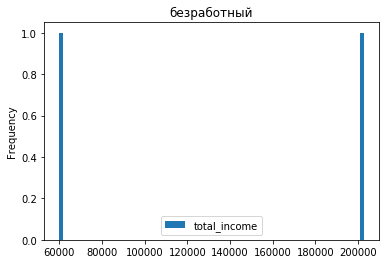

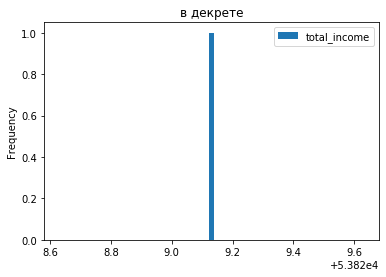

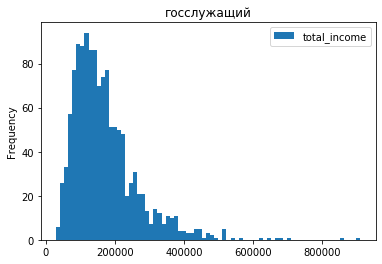

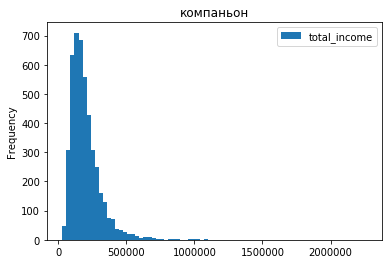

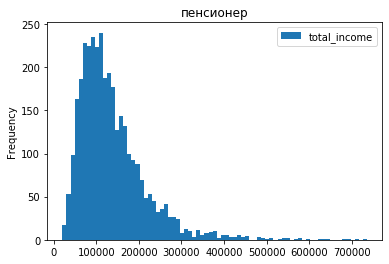

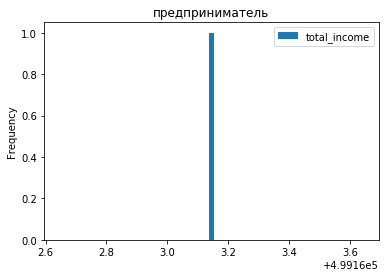

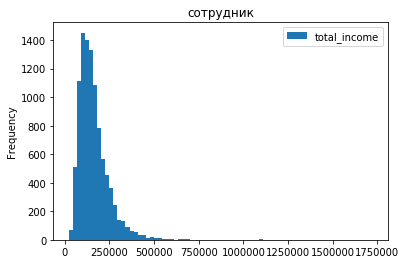

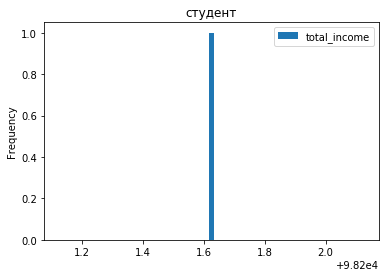

In [21]:
for type, data in df_not_null.groupby('income_type'):
    data.plot(y='total_income', kind='hist', title=type, bins=75)

Действительно, на диаграммах с большим количеством данных можно видеть распределение Пуассона: чем выше зарплата, тем меньше клиентов ее получают. Заполним пропуски в столбце `total_income` медианным значением для каждого типа занятости из столбца `income_type`.

In [22]:
for income_type in df['income_type'].unique():
    total_income_median = df.loc[df['income_type'] == income_type, 'total_income'].median()
    df.loc[df['income_type'] == income_type, 'total_income'] = df.loc[df['income_type'] == income_type, 'total_income'].fillna(total_income_median)

Проверим, что не осталось пропусков в данных и перейдем к следующему шагу: изменение типов данных.

In [23]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных.

Столбцы `days_employed` и `total_income` таблицы имеют вещественный тип данных. Дробная часть чисел не существенна для результатов исследования, поэтому приведем значения столбцов к целочисленному типу методом `astype()`. 

In [24]:
df = df.astype({'days_employed': 'int', 'total_income': 'int'})

Проверим тип столбцов с помощью метода `info`.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
children            21453 non-null int64
days_employed       21453 non-null int64
dob_years           21453 non-null int64
education           21453 non-null object
education_id        21453 non-null int64
family_status       21453 non-null object
family_status_id    21453 non-null int64
gender              21453 non-null object
income_type         21453 non-null object
debt                21453 non-null int64
total_income        21453 non-null int64
purpose             21453 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Теперь столбцы имеют целочисленный тип. 

Можно заметить, что в таблице имеются колонки с категориальными данными, которые следует вынести в отдельные словари для удобства работы с таблицей и сокращения времени обработки данных.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

В таблице встречаются пары столбцов `education` и `education_id`, `family_status` и `family_status_id`. Один столбец присваивает строке уникальный идентификатор уровня образования и семейного статуса, а второй расшифровывает этот идентификатор. 

Создадим "словарь" для уровней образования. Для этого вынесем столбцы `education` и `education_id` в отдельную таблицу и оставим только уникальные значения.

In [26]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Аналогичным образом сформируем "словарь" семейных статусов.

In [27]:
family_status_dict = df[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Удалим из исходной таблицы столбцы `education` и `family_status` методом `drop` библиотеки `pandas`. Теперь они находятся в отдельных таблицах, к которым в любой момент можно обратиться по идентификаторам `education_id` и `family_status_id`.

In [28]:
df = df.drop(columns=['education', 'family_status'])

### Категоризация дохода.

Значения столбца `total_income` имеют довольно большой разброс значений. Для удобства анализа категоризуем его, задав для каждого диапазона значений код категории:

0–30000 — `E`;

30001–50000 — `D`;

50001–200000 — `C`;

200001–1000000 — `B`;

1000001 и выше — `A`.

Например, кредитополучателю с доходом 25000 назначим категорию `E`, а клиенту, получающему 235000, — `B`.

Напишем функцию, которая возвращает код категории в зависимости от дохода клиента.

In [29]:
def get_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    if total_income <= 50000:
        return 'D'
    if total_income <= 200000:
        return 'C'
    if total_income <= 1000000:
        return 'B'
    return 'A'

Добавим в таблицу столбец `total_income_category` и заполним его значениями, передав в созданную функцию значение ежемесячного дохода для каждой строки.

In [30]:
df['total_income_category'] = df['total_income'].apply(get_income_category)

### Категоризация целей кредита.

При поиске дубликатов мы выводили уникальные значения столбцов. Можно было заметить, что в столбце `purpose` встречаются схожие цели кредита, которые можно разделить на 4 большие группы:
* операции с автомобилем;
* операции с недвижимостью;
* проведение свадьбы;
* получение образования.

Создадим функцию, которая в зависимости от цели кредита установить группу, к которой эта цель относится. Определять попадание цели в ту или иную категорию будем по наличию части ключевых слов в значении с помощью функции `find()`.

In [31]:
def get_purpose_category(purpose):
    if purpose.find('автомобил') != -1:
        return 'операции с автомобилем'
    if purpose.find('недвижимост') != -1 or purpose.find('жиль') != -1:
        return 'операции с недвижимостью'
    if purpose.find('свадьб') != -1:
        return 'проведение свадьбы'
    if purpose.find('образовани') != -1:
        return 'получение образование'
    return 'категория не определена'

Добавим в таблицу столбец `purpose_category` и заполним его значениями, передав в созданную функцию значение цели кредита для каждой строки.

In [32]:
df['purpose_category'] = df['purpose'].apply(get_purpose_category)

Проверим, что для каждой цели кредита определилась категория, задействовав функцию `unique()`.

In [33]:
df['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образование', 'проведение свадьбы'], dtype=object)

Закончив с предобработкой данных, можем перейти к проверке гипотез.

## Проверка гипотез

### Зависимость между количеством детей и возвратом кредита в срок

Первая гипотеза утверждает, что возврат кредита в срок зависит от количества детей в семье. Найдем число должников и общее число граждан в разрезе количества детей в семье с помощью функции `pivot_table()`. Затем рассчитаем процентное соотношение граждан, вернувших кредит вовремя, к общему числу заемщиков. Для работы с непредсказуемым поведением данных воспользуемся конструкцией `try-except`.

In [34]:
debt_and_children = df.pivot_table(index='children', values='debt', aggfunc=['sum', 'count'])

for x in debt_and_children.index:
    try:
        print(f'Процент возврата кредита в срок среди {debt_and_children[("count", "debt")][x]} клиента(-ов) с количеством детей, равным {x}: {(debt_and_children[("count", "debt")][x] - debt_and_children[("sum", "debt")][x]) / debt_and_children[("count", "debt")][x]:.0%}')
    except:
        print('Деление на ноль')

Процент возврата кредита в срок среди 14090 клиента(-ов) с количеством детей, равным 0: 92%
Процент возврата кредита в срок среди 4855 клиента(-ов) с количеством детей, равным 1: 91%
Процент возврата кредита в срок среди 2128 клиента(-ов) с количеством детей, равным 2: 91%
Процент возврата кредита в срок среди 330 клиента(-ов) с количеством детей, равным 3: 92%
Процент возврата кредита в срок среди 41 клиента(-ов) с количеством детей, равным 4: 90%
Процент возврата кредита в срок среди 9 клиента(-ов) с количеством детей, равным 5: 100%


Процент возврата кредита в срок среди семей с 5 детьми составляет 100%. В то же время процент возврата кредита среди клиентов с меньшим количеством детей примерно одинаков. 

Таким образом, первая гипотеза подтвердилась лишь частично: заемщики с 5 детьми всегда возвращают кредит в срок, процент кредитов, погашенных в срок среди клиентов с количеством детей, меньшим пяти, почти не различается. 

In [43]:
debt_and_children['ratio'] = debt_and_children[("sum", "debt")] / debt_and_children[("count", "debt")]
debt_and_children

,sum,count,ratio
,debt,debt,
children,,,
0,1063,14090,0.075444
1,445,4855,0.091658
2,202,2128,0.094925
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


### Зависимость между семейным положением и возвратом кредита в срок

Вторая гипотеза предполагает, что существует зависимость между количеством кредитов, возвращенных в срок, и семейным положением клиента. Проверим эту гипотезу, определив процент погашенных в срок кредитов для каждого типа семейного статуса. Сначала сгруппируем данные по семейному статусу с помощью функции `groupby()` и посчитаем количество граждан, не вернувших долг вовремя и общее число клиентов посредством функции `agg()`. Затем рассчитаем процентное соотношение должников к числу всех заемщиков.

In [35]:
debt_and_family_status_id = df.groupby('family_status_id')['debt'].agg(['sum', 'count'])

for x in debt_and_family_status_id.index:
    try:
        print(f'Процент возврата кредита в срок среди {debt_and_family_status_id["count"][x]} клиента(-ов) в семейном статусе {family_status_dict[family_status_dict["family_status_id"] == x]["family_status"][x]}: {(debt_and_family_status_id["count"][x] - debt_and_family_status_id["sum"][x]) / debt_and_family_status_id["count"][x]:.0%}')
    except:
        print('Деление на ноль')

Процент возврата кредита в срок среди 12339 клиента(-ов) в семейном статусе женат / замужем: 92%
Процент возврата кредита в срок среди 4150 клиента(-ов) в семейном статусе гражданский брак: 91%
Процент возврата кредита в срок среди 959 клиента(-ов) в семейном статусе вдовец / вдова: 93%
Процент возврата кредита в срок среди 1195 клиента(-ов) в семейном статусе в разводе: 93%
Процент возврата кредита в срок среди 2810 клиента(-ов) в семейном статусе Не женат / не замужем: 90%


Разведенные и овдовевшие граждане чаще других возвращают кредиты в срок. Клиенты, ни разу не состоявшие в официальном браке, наиболее склонны пропускать сроки возврата. Зависимость определенно прослеживается: одинокие клиенты, состоявшие в отношениях, ответственней одиноких заемщиков, ранее не вступавших в отношения.

Можем утверждать что, вторая гипотеза частично подтвердилась: погашение кредита в срок зависит от семейного статуса клиента, в том случае, если на момент обращения, он не состоит в официальных отношениях.

### Зависимость между уровнем дохода и возвратом кредита в срок

Проверим третью гипотезу, сформулированную в ходе исследования: существует зависимость между уровнем дохода заемщика и фактом возврата кредита в срок. Для этого определим процентное соотношение возвращенных в срок кредитов к общему их числу для каждой категории доходности кредитополучателя.

In [36]:
debt_and_total_income_category = df.pivot_table(index='total_income_category', values='debt', aggfunc=['sum', 'count'])

for x in debt_and_total_income_category.index:
    try:
        print(f'Процент возврата кредита в срок среди {debt_and_total_income_category[("count", "debt")][x]} клиента(-ов) с ежемесячным доходом категории {x}: {(debt_and_total_income_category[("count", "debt")][x] - debt_and_total_income_category[("sum", "debt")][x]) / debt_and_total_income_category[("count", "debt")][x]:.0%}')
    except:
        print('Деление на ноль')

Процент возврата кредита в срок среди 25 клиента(-ов) с ежемесячным доходом категории A: 92%
Процент возврата кредита в срок среди 5042 клиента(-ов) с ежемесячным доходом категории B: 93%
Процент возврата кредита в срок среди 16014 клиента(-ов) с ежемесячным доходом категории C: 92%
Процент возврата кредита в срок среди 350 клиента(-ов) с ежемесячным доходом категории D: 94%
Процент возврата кредита в срок среди 22 клиента(-ов) с ежемесячным доходом категории E: 91%


Клиенты с ежемесячным доходом от 30 до 50 тысяч рублей наиболее охотно возвращают кредиты в срок, в то время как клиенты с доходом до 30 тысяч рублей чаще других задерживают погашение. 

Очевидной зависимости между размером дохода и возвратом кредитов в срок не прослеживается: процент погашенных в срок кредитов среди заемщиков с низким и высоким доходом почти одинаков.

### Зависимость между целью кредита и возвратом кредита в срок

Наконец, проверим последнюю гипотезу. Узнаем, влияет ли цель кредита на срок его возврата.

In [37]:
debt_and_purpose_category = df.pivot_table(index='purpose_category', values='debt', aggfunc=['sum', 'count'])

for x in debt_and_purpose_category.index:
    try:
        print(f'Процент возврата кредита в срок среди {debt_and_purpose_category[("count", "debt")][x]} клиента(-ов), указавших целью кредитования {x}: {(debt_and_purpose_category[("count", "debt")][x] - debt_and_purpose_category[("sum", "debt")][x]) / debt_and_purpose_category[("count", "debt")][x]:.0%}')
    except:
        print('Деление на ноль')

Процент возврата кредита в срок среди 4306 клиента(-ов), указавших целью кредитования операции с автомобилем: 91%
Процент возврата кредита в срок среди 10811 клиента(-ов), указавших целью кредитования операции с недвижимостью: 93%
Процент возврата кредита в срок среди 4013 клиента(-ов), указавших целью кредитования получение образование: 91%
Процент возврата кредита в срок среди 2323 клиента(-ов), указавших целью кредитования проведение свадьбы: 92%


Граждане, взявшие кредит на операции с недвижимостью чаще других возвращают кредит в срок. Заемщики, указавшие целью получение образования и операции с автомобилем, реже остальных.

Процент погашенных в срок кредитов в разрезе целей кредитования примерно одинаков и находится в пределах 91-93%. Следовательно, гипотеза не подтверждена: цель кредита не влияет на его факт возврата в срок.

## Итоги исследования:

Мы проверили 4 гипотезы и установили:
* клиенты с 5 детьми всегда возвращают кредит в срок, однако явной зависимости между процентом погашенных в срок кредитом среди заемщиков с меньшим количеством детей не наблюдается;
* разведенные и овдовевшие кредитополучатели чаще холостых клиентов возвращают кредит в срок;
* среднемесячный доход заемщика не влияет на соблюдение сроков погашения кредита;
* факт возврата кредита в срок не зависит от цели кредитования.